<a href="https://colab.research.google.com/github/Subhajit53/Book-Recommendation-System/blob/main/Book_Recommendation_System_Colab_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Book Recomendation System </u></b>

# **Problem Statement :**

##### During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys. 
##### In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries). 
##### Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users. 
### **Content  :**
The Book-Crossing dataset comprises 3 files. 
* **Users :**
##### Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values. 
* **Books :**
##### Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website. 
* **Ratings :**
##### Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

# **Introduction :**

A recommendation system is a subclass of Information filtering Systems that seeks to predict the rating or the preference a user might give to an item. In simple words, it is an algorithm that suggests relevant items to users. Eg: In the case of Netflix which movie to watch, In the case of e-commerce which product to buy, or In the case of kindle which book to read, etc.

# **Approach :**

##### To build a recommendation system for the books, I'm first going to clean the 3 datasets and merge them into a single one to make it workable.

##### I'm going to use Popularity Based recommendation, Similar Author-Publisher based recommendation and Collaborative filtering here. We can't use content-based filtering here as there are no genre or book description on which we can build a tf-idf matrix.

# **Building the Recommendation System :**

### **Reading the datasets :**

In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Reading the datasets
books = pd.read_csv('/content/drive/MyDrive/Unsupervised project/Books.csv')
users = pd.read_csv('/content/drive/MyDrive/Unsupervised project/Users.csv')
ratings = pd.read_csv('/content/drive/MyDrive/Unsupervised project/Ratings.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Getting shapes of the datasets
print("Books Data:    ", books.shape)
print("Users Data:    ", users.shape)
print("Books-ratings: ", ratings.shape)

Books Data:     (271360, 8)
Users Data:     (278858, 3)
Books-ratings:  (1149780, 3)


### **Pre-processing the datasets :**

#### **Pre-processeing Books Dataset :**

In [4]:
# Viewing the head of the dataset
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


We can see that there are 3 URL columns which are unnecessary for our purpose. So let's drop them.

In [5]:
# Dropping URL columns
books.drop(['Image-URL-S','Image-URL-M','Image-URL-L'], axis = 1, inplace = True)

In [6]:
# Viewing the head again
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


Cool! Now let's check for null values.

In [7]:
# Getting counts of null values
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

It seems like we have got a few null values in Book-Author and Publisher column. I'm going to set those null values as 'Other' so that we don't lose any data.

In [8]:
# Imputing the missing values
books.loc[books['Book-Author'].isnull(),'Book-Author'] = 'Other'
books.loc[books['Publisher'].isnull(),'Publisher'] = 'Other'

Now let's check the Year-Of-Publication column as in my past experience I've seen that years get really messy in dataframes.

In [9]:
# Getting unique publication years
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

Seems really bad to me! We can see that some publications are of future years. Even there are some Publishing companies as publishing years. We need to investigate that.

In [10]:
# Setting column with so that we can see the column materials in full
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [11]:
# Getting rows where year of publication is mistakenly inputted as DK Publishing Inc
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [12]:
# Getting rows where year of publication is mistakenly inputted as Gallimard
books.loc[books['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


It seems like the data inputted was really messed up. Below I've tried to correct the values of those rows from whatever already exists in the rows.

In [13]:
# Correcting the messed up rows
books.loc[209538 ,'Publisher'] = 'DK Publishing Inc'
books.loc[209538 ,'Year-Of-Publication'] = 2000
books.loc[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books.loc[209538 ,'Book-Author'] = 'Michael Teitelbaum'

books.loc[221678 ,'Publisher'] = 'DK Publishing Inc'
books.loc[221678 ,'Year-Of-Publication'] = 2000
books.loc[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books.loc[209538 ,'Book-Author'] = 'James Buckley'

books.loc[220731 ,'Publisher'] = 'Gallimard'
books.loc[220731 ,'Year-Of-Publication'] = '2003'
books.loc[209538 ,'Book-Title'] = 'Peuple du ciel - Suivi de Les bergers '
books.loc[209538 ,'Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'

As we are done with the problem of publishing houses in year of publishing, let's now work on the futuristic years.

In [14]:
# Converting year of publication in Numbers
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

In [15]:
# Printing year of publications
print(sorted(list(books['Year-Of-Publication'].unique())))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [16]:
# Uppercasing ISBN numbers
books['ISBN'] = books['ISBN'].str.upper()

In [17]:
# Viewing rows with year of publication as 0
books[books['Year-Of-Publication']==0]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH"
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV)
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda Del Fiume Piedra,P Coelho,0,Fabbri - RCS Libri
...,...,...,...,...,...
270794,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd
270913,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square
271094,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino
271182,0887781721,Tom Penny,Tony German,0,P. Martin Associates


It seems like these are erroneous entries. The books were not published in the year 0. So, I'm going to impute these years with the mode.

In [18]:
# Getting value counts of different publication years
books['Year-Of-Publication'].value_counts()

2002    17627
1999    17431
2001    17359
2000    17234
1998    15766
        ...  
1910    1    
1934    1    
1914    1    
1904    1    
2037    1    
Name: Year-Of-Publication, Length: 116, dtype: int64

In [19]:
# Imputing publication year '0' with '2002'
books.loc[books['Year-Of-Publication'] == 0, 'Year-Of-Publication'] = 2002

Now, let's impute the columns with year of publication as greater than 2021. I'll simply google about those books and change the years.

In [20]:
# Changing publication years of books having years greater than 2021
books.loc[books['Year-Of-Publication']==2024, 'Year-Of-Publication'] = 2013
books.loc[books['Year-Of-Publication']==2026, 'Year-Of-Publication'] = 1996
books.loc[37487, 'Year-Of-Publication'] = 1991
books.loc[55676, 'Year-Of-Publication'] = 2016
books.loc[78168, 'Year-Of-Publication'] = 2001
books.loc[192993, 'Year-Of-Publication'] = 1999
books.loc[240169, 'Year-Of-Publication'] = 1987
books.loc[228173, 'Year-Of-Publication'] = 1925
books.loc[260974, 'Year-Of-Publication'] = 1991
books.loc[books['Year-Of-Publication']==2037, 'Year-Of-Publication'] = 1937
books.loc[books['Year-Of-Publication']==2038, 'Year-Of-Publication'] = 1952
books.loc[80264, 'Year-Of-Publication'] = 1871
books.loc[97826, 'Year-Of-Publication'] = 1942

Now, let's drop the duplicate rows.

In [21]:
# Drop duplicate rows
books.drop_duplicates(keep='last', inplace=True) 
books.reset_index(drop = True, inplace = True)

In [22]:
# Getting a final info of the dataset
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271047 entries, 0 to 271046
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271047 non-null  object
 1   Book-Title           271047 non-null  object
 2   Book-Author          271047 non-null  object
 3   Year-Of-Publication  271047 non-null  int64 
 4   Publisher            271047 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.3+ MB


Great! We are done with the Books dataset. Now, let's begin with the Users dataset.

#### **Pre-processeing Users Dataset :**

In [23]:
# Viewing the head of the users dataset
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [24]:
# Checking null values
print(users.isna().sum())

User-ID     0     
Location    0     
Age         110762
dtype: int64


In [25]:
# Check for all values present in Age column
print(sorted(list(users['Age'].unique())))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

We can see that there are some people whose ages had been inputted as very huge which is impossible. Even some ages are missing or 0. So, I'm going to bar the ages between 10 and 80. And also, I'll replace anything beyond this range and null values with the mean of the ages of the taken range.

In [26]:
# Taking ages between 10 and 80
required = users[users['Age'] <= 80]
required = required[required['Age'] >= 10]

In [27]:
# Getting the mean age
mean_age = round(required['Age'].mean())
mean_age

35

In [28]:
users.loc[users['Age'] > 80, 'Age'] = mean_age    #outliers with age grater than 80 are replaced with mean 
users.loc[users['Age'] < 10, 'Age'] = mean_age    #outliers with age less than 10 years are replaced with mean
users['Age'] = users['Age'].fillna(mean_age)      #filling null values with mean
users['Age'] = users['Age'].astype(int)           #changing Datatype to int

Now, let's split the location into city, state and country.

In [29]:
def string_splitter(string, verbose):
  '''Takes location string and returns city(verbose = 0), state(verbose=1), country(verbose=2)'''
  string_split = string.split(', ')
  if len(string_split) == 3 : # Taking values accordingly if all 3 values are available well
    city = string.split(', ')[0]
    state = string.split(', ')[1]
    country = string.split(', ')[2]
  elif len(string_split) == 2 : # Setting country as 'Other' if location has only 2 information
    city = string.split(', ')[0]
    state = string.split(', ')[1]
    country = 'Other'
  elif len(string_split) == 1 : # Setting city and country as 'Other' if location has only 1 information
    city = string.split(', ')[0]
    state = 'Other'
    country = 'Other'
  elif len(string_split) == 4 : # Taking first two values as city if location has 4 information
    city = string.split(', ')[0] + string.split(', ')[1]
    state = string.split(', ')[2]
    country = string.split(', ')[3]
  else: # Setting all values to 'Other if location has more than 4 information
    city = 'Other'
    state = 'Other'
    country = 'Other'
  if verbose == 0:
    return city
  elif verbose == 1:
    return state
  else:
    return country

In [30]:
users['city'] = users.apply(lambda x: string_splitter(x['Location'], verbose = 0), axis=1) # Constructing city variable
users['state'] = users.apply(lambda x: string_splitter(x['Location'], verbose = 1), axis=1) # Constructing state variable
users['country'] = users.apply(lambda x: string_splitter(x['Location'], verbose = 2), axis=1) # Constructing country variable

In [31]:
# Dropping the Location column
users.drop(['Location'], axis = 1, inplace = True)

In [32]:
# Replacing states with n/a as 'Other'
users.loc[users['state'] == 'n/a', 'state'] = 'Other'

In [33]:
# Checking a final info
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   User-ID  278858 non-null  int64 
 1   Age      278858 non-null  int64 
 2   city     278858 non-null  object
 3   state    278858 non-null  object
 4   country  278858 non-null  object
dtypes: int64(2), object(3)
memory usage: 10.6+ MB


In [34]:
# Viewing the head
users.head()

,User-ID,Age,city,state,country
0,1,35,nyc,new york,usa
1,2,18,stockton,california,usa
2,3,35,moscow,yukon territory,russia
3,4,17,porto,v.n.gaia,portugal
4,5,35,farnborough,hants,united kingdom


#### **Pre-processeing Ratings Dataset :**

In [35]:
# Viewing the head of the ratings dataset
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [36]:
# Checking for null values
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

Great! There are no null values in the dataset. Now, let's work with the ISBN numbers.

In [37]:
# removing extra characters from ISBN (from ratings dataset) existing in books dataset
bookISBN = books['ISBN'].tolist() 
reg = "[^A-Za-z0-9]" 
for index, row_Value in ratings.iterrows():
    z = re.search(reg, row_Value['ISBN'])    
    if z:
        f = re.sub(reg,"",row_Value['ISBN'])
        if f in bookISBN:
            ratings.at[index , 'ISBN'] = f

In [38]:
# Uppercasing all alphabets in ISBN
ratings['ISBN'] = ratings['ISBN'].str.upper()

In [39]:
# Drop duplicate rows
ratings.drop_duplicates(keep='last', inplace=True)
ratings.reset_index(drop=True, inplace=True)

In [40]:
# Getting a final info
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149776 entries, 0 to 1149775
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149776 non-null  int64 
 1   ISBN         1149776 non-null  object
 2   Book-Rating  1149776 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


### **Merging the datasets :**

In [41]:
dataset = pd.merge(books, ratings, on='ISBN', how='inner') # Merging books and ratings dataset
dataset = pd.merge(dataset, users, on='User-ID', how='inner') # Merging already merged dataset and users dataset
dataset.info() # Getting info of the final dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031609 entries, 0 to 1031608
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   ISBN                 1031609 non-null  object
 1   Book-Title           1031609 non-null  object
 2   Book-Author          1031609 non-null  object
 3   Year-Of-Publication  1031609 non-null  int64 
 4   Publisher            1031609 non-null  object
 5   User-ID              1031609 non-null  int64 
 6   Book-Rating          1031609 non-null  int64 
 7   Age                  1031609 non-null  int64 
 8   city                 1031609 non-null  object
 9   state                1031609 non-null  object
 10  country              1031609 non-null  object
dtypes: int64(4), object(7)
memory usage: 94.4+ MB


### **Data Visualization :**

Text(0.5, 1.0, 'Authors who have written most number of books (Top 20)')

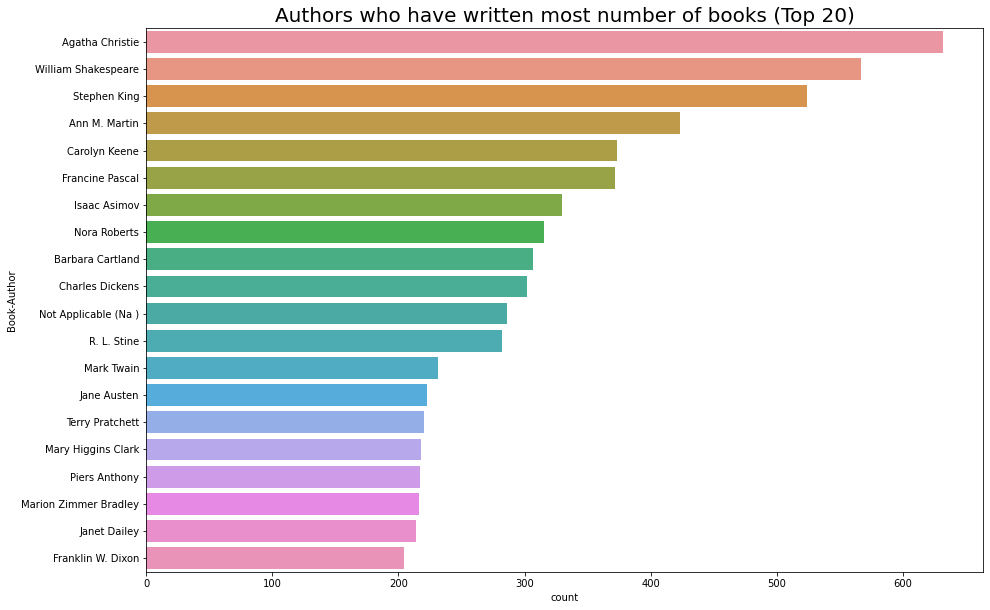

In [ ]:
# Visualizing authors with most number of books (top 20)
plt.figure(figsize=(15,10))
sns.countplot(y="Book-Author", data=books,order=books['Book-Author'].value_counts().index[0:20])
plt.title('Authors who have written most number of books (Top 20)', fontsize = 20)

Most of the books are from Agatha Christie, William Shakespeare and Stephen King in the given dataset.

Text(0, 0.5, 'Count')

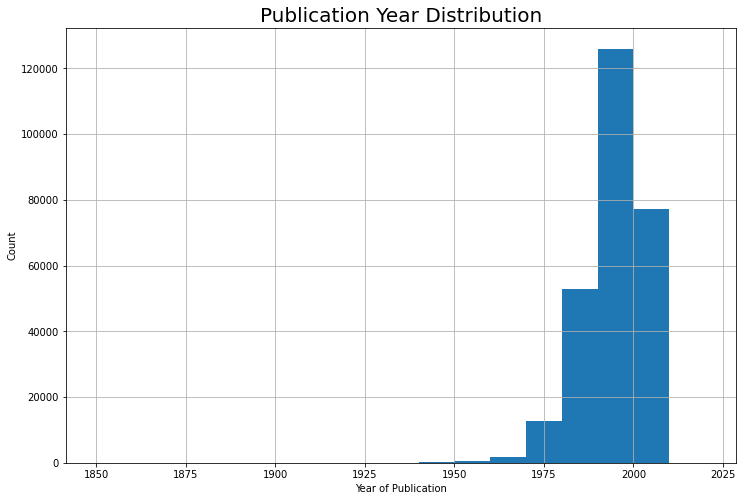

In [ ]:
# Visualizing distribution of books released after 1850
plt.figure(figsize=(12,8))
books[books['Year-Of-Publication']>1850]['Year-Of-Publication'].hist(bins=[10*i for i in range(185, 203)])
plt.title('Publication Year Distribution', fontsize = 20)
plt.xlabel('Year of Publication')
plt.ylabel('Count')

Most of the books are written between 1960 and 2010.

Text(0.5, 1.0, 'Publishers who have published most number of books (Top 20)')

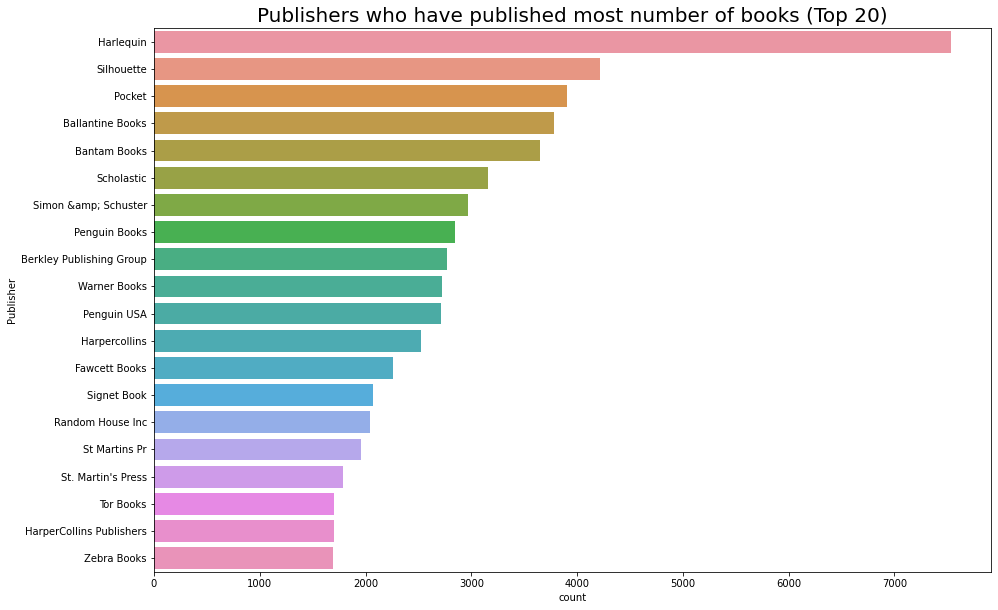

In [ ]:
# Visualizing publishers with most number of published books (top 20)
plt.figure(figsize=(15,10))
sns.countplot(y="Publisher", data=books,order=books['Publisher'].value_counts().index[0:20])
plt.title('Publishers who have published most number of books (Top 20)', fontsize = 20)

Harlequin, Silhoutte and Pocket are three most famous publishers.

Text(0.5, 1.0, 'Distribution of Book Ratings')

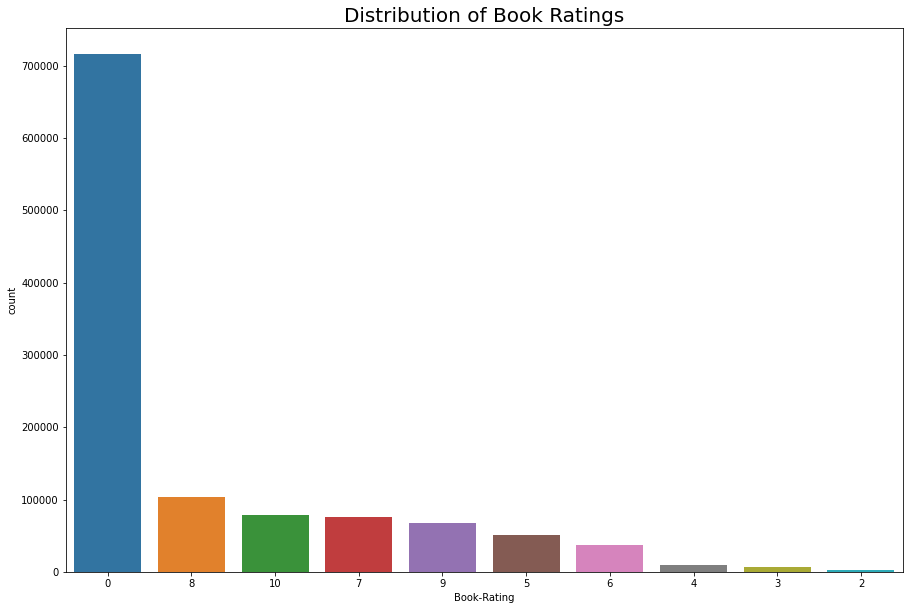

In [ ]:
# Visualizing distribution of book ratings
plt.figure(figsize=(15,10))
sns.countplot(x="Book-Rating", data=ratings, order=ratings['Book-Rating'].value_counts().index[0:10])
plt.title('Distribution of Book Ratings', fontsize = 20)

Seems like many book ratings have been inputted as 0. I will split the dataset into implicit and explicit sets for 0 and non-zero ratings respectively.

Text(0, 0.5, 'Count')

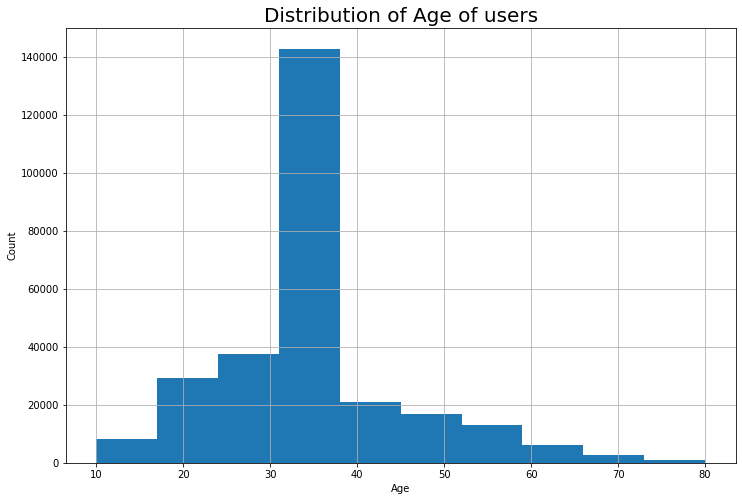

In [44]:
# Visualizing distribution of age of users
plt.figure(figsize=(12,8))
users['Age'].hist()
plt.title('Distribution of Age of users', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')

Most of the users are between the age group 20-40. The hike around 35 might be for imputing age values.

Text(0.5, 1.0, 'Cities with most number of readers (Top 20)')

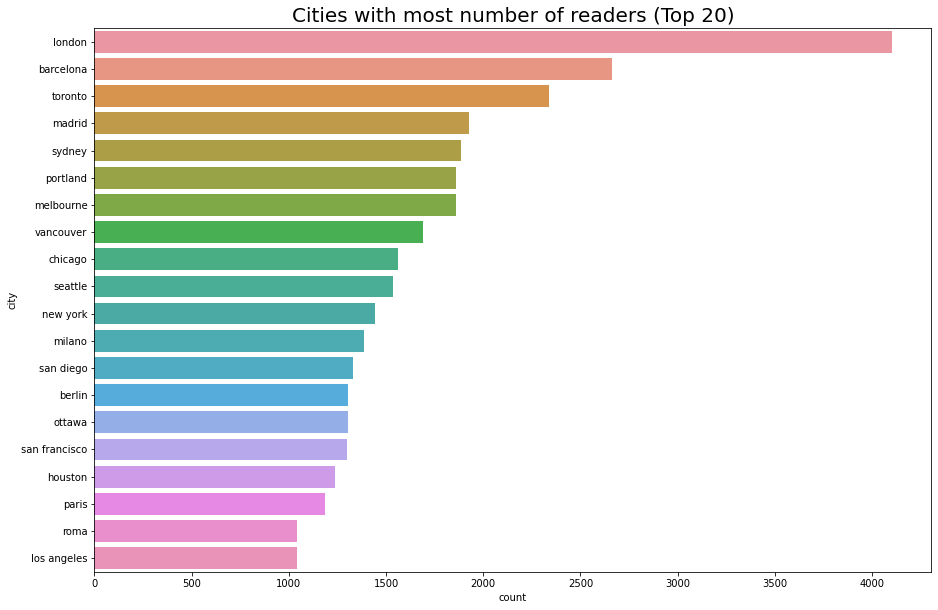

In [ ]:
# Visualizing top cities (top 20) according to number of readers
plt.figure(figsize=(15,10))
sns.countplot(y="city", data=users, order=users['city'].value_counts().index[0:20])
plt.title('Cities with most number of readers (Top 20)', fontsize = 20)

London, Barcelona and Toronto has most number of readers.

Text(0.5, 1.0, 'States with most number of readers (Top 20)')

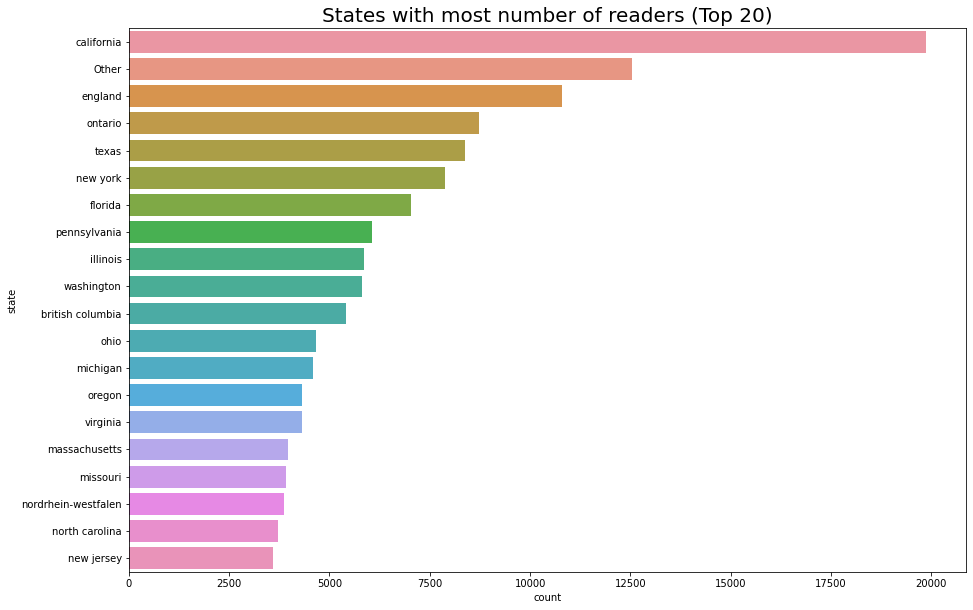

In [ ]:
# Visualizing top states (top 20) according to number of readers
plt.figure(figsize=(15,10))
sns.countplot(y="state", data=users, order=users['state'].value_counts().index[0:20])
plt.title('States with most number of readers (Top 20)', fontsize = 20)

Most of the readers are from California, England and Ontario. And also some readers have fallen into 'Other' category.

Text(0.5, 1.0, 'Countries with most number of readers (Top 20)')

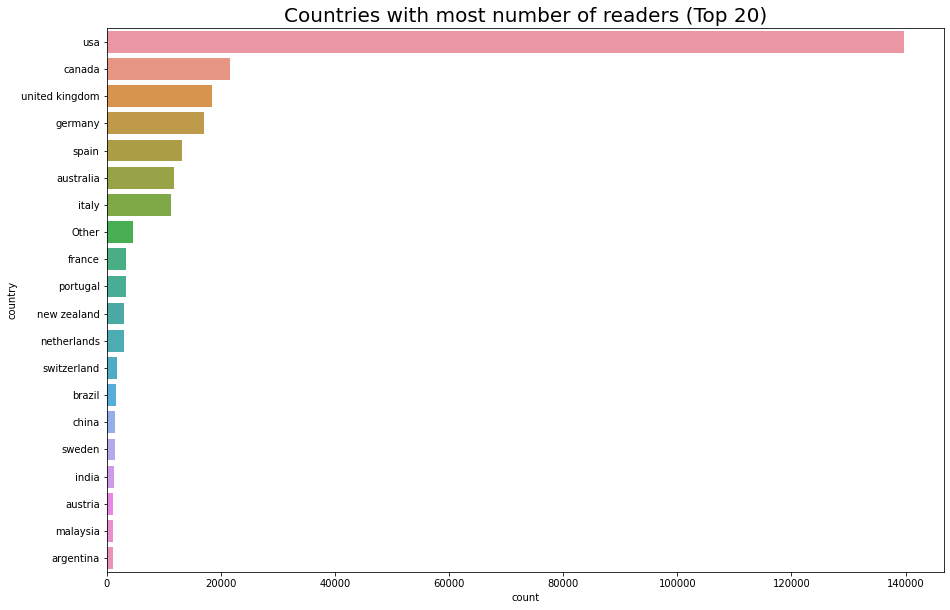

In [ ]:
# Visualizing top countries (top 20) according to number of readers
plt.figure(figsize=(15,10))
sns.countplot(y="country", data=users, order=users['country'].value_counts().index[0:20])
plt.title('Countries with most number of readers (Top 20)', fontsize = 20)

Number of readers in USA is way past any other country. Canada, UK, Germany also have significant number of customers.

Text(0.5, 1.0, 'Most popular books')

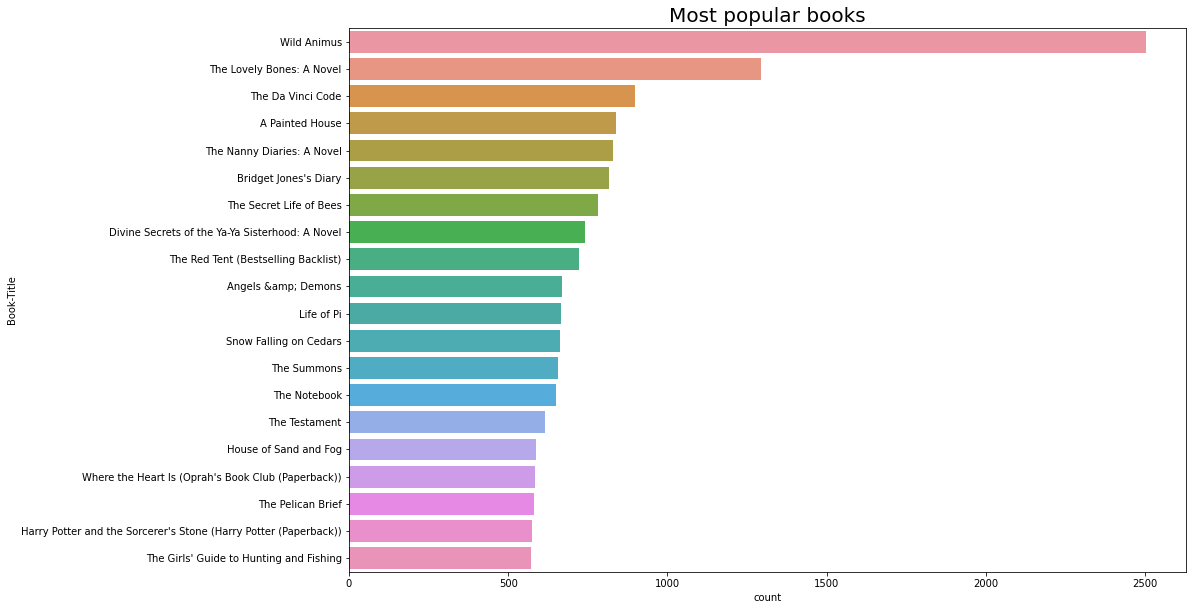

In [46]:
# Visualizing most popular books
plt.figure(figsize=(15,10))
sns.countplot(y="Book-Title", data=dataset, order=dataset['Book-Title'].value_counts().index[0:20])
plt.title('Most popular books', fontsize = 20)

Wild Animus, The Lovely Bones and The Da Vinci Code are the 3 most popular books.

### **Dividing the dataset into implicit and explicit based on 0 and non-zero ratings :**

In [ ]:
## Explicit Ratings Dataset
dataset1 = dataset[dataset['Book-Rating'] != 0]
dataset1 = dataset1.reset_index(drop = True)
dataset1.shape

(384074, 11)

In [ ]:
## Implicit Ratings Dataset
dataset2 = dataset[dataset['Book-Rating'] == 0]
dataset2 = dataset2.reset_index(drop = True)
dataset2.shape

(647535, 11)

### **Recommendation Systems :**

#### **1. Popularity Based (Top in Whole Collection) :**

In [ ]:
def popularity_based(dataframe, n):
  '''Takes dataframe and number of books to recommend as input and returns a dataframe consisting of recommended books'''
  if n >= 1 and n <= len(dataframe): # Checking if given number of book is in range 1 and length of the dataframe
    data = pd.DataFrame(dataframe.groupby('ISBN')['Book-Rating'].count()).sort_values('Book-Rating', ascending=False).head(n) # Getting top n rated books (ISBNs)
    result = pd.merge(data, books, on='ISBN') # Merging output data of highest rated books and books dataset
    return result
  else:
    return "Invalid number of books entered!!"

In [ ]:
# Hands-on recommendation
number_of_books =  5#@param {type:"integer"}
popularity_based(dataset1, number_of_books)

,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0316666343,707,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
1,0971880107,581,Wild Animus,Rich Shapero,2004,Too Far
2,0385504209,488,The Da Vinci Code,Dan Brown,2003,Doubleday
3,0312195516,383,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
4,0060928336,320,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial


#### **2. Popularity Based (Top in a given place (City, State or Country)) :**

In [ ]:
def search_unique_places(dataframe, place):
    '''Takes dataframe and place as input and returns a subset of the dataframe containing the given place'''
    place = place.lower()

    if place in list(dataframe['city'].unique()): 
        return dataframe[dataframe['city'] == place]
    elif place in list(dataframe['state'].unique()):
        return dataframe[dataframe['state'] == place]
    elif place in list(dataframe['country'].unique()):
        return dataframe[dataframe['country'] == place]
    else:
        return "Invalid Entry"

In [ ]:
# Hands-on recommendation
place = "india" #@param {type:"string"}
number_of_books =  5#@param {type:"integer"}

data = search_unique_places(dataset1, place)

# Recommending based on popularity for given place
data = popularity_based(data, number_of_books)

data

,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0971880107,3,Wild Animus,Rich Shapero,2004,Too Far
1,0671047612,2,Skin And Bones,Franklin W. Dixon,2000,Aladdin
2,0486284735,2,Pride and Prejudice (Dover Thrift Editions),Jane Austen,1995,Dover Publications
3,8171670407,2,Inscrutable Americans,Mathur Anurag,1996,South Asia Books
4,0006944035,1,Secret Island / Secret Mountain (Two-in-ones),Enid Blyton,1994,HarperCollins Publishers


#### **3. Recommending Based on same Author and Publisher :**

In [ ]:
def printBook(k, n):
    '''Takes dataframe and number of books as input and returns recommended books'''
    z = k['Book-Title'].unique() # Taking unique books
    for x in range(len(z)): # Printing books until n
        print(z[x])
        if x >= n-1:
            break

In [ ]:
def get_books(dataframe, name, n):
    '''Takes dataframe, book name and number of books as input and returns recommendations based on same authors and publishers'''

    print("\nBooks by same Author:\n")
    au = dataframe['Book-Author'].unique() # Taking author of the book

    data = dataset1[dataset1['Book-Title'] != name] # Taking rows that is not the given book

    if au[0] in list(data['Book-Author'].unique()): # Checking if the author of the book has written any other books
        k2 = data[data['Book-Author'] == au[0]] # Taking dataframe having only that author
    k2 = k2.sort_values(by=['Book-Rating']) # Sorting the dataframe according to ratings
    printBook(k2, n) # Printing recommendations

    print("\n\nBooks by same Publisher:\n")
    au = dataframe['Publisher'].unique() # Taking publisher of the book

    if au[0] in list(data['Publisher'].unique()): # Checking if the publisher of the book has published any other books
        k2 = pd.DataFrame(data[data['Publisher'] == au[0]]) # Taking dataframe having only that publisher
    k2=k2.sort_values(by=['Book-Rating']) # Sorting the dataframe according to ratings
    printBook(k2, n) # Printing recommendations

In [ ]:
book_read = 'Harry Potter and the Goblet of Fire (Book 4)' #@param {type : 'string'}
number_of_books =  5#@param {type:"integer"}

if book_read in list(dataset1['Book-Title'].unique()): # Checking if book exists in the dataset
    d = dataset1[dataset1['Book-Title'] == book_read]
    get_books(d, book_read, number_of_books)
else:
    print("Invalid Book Name!!")


Books by same Author:

Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Order of the Phoenix (Book 5)
Harry Potter y el cÃ¡liz de fuego
Harry Potter and the Chamber of Secrets (Book 2)
Fantastic Beasts and Where to Find Them


Books by same Publisher:

What Should I Do? (All About You)
City in the Clouds (Secrets of Droon, 4)
The Great Ice Battle (Secrets of Droon, 5)
The Sleeping Giant of Goll (Secrets of Droon, 6)
The Hidden Stairs and the Magic Carpet (Secret of Droon, No 1)


#### **4. Collaborative Filtering based Recommendation System--(User-Item based) :**

Let's first build a user-item matrix and factorize it with 20 number of factors.

In [ ]:
# Importing essential libraries
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [ ]:
## Explicit Ratings Dataset
ratings_explicit = ratings[ratings['Book-Rating'] != 0]
ratings_explicit = ratings_explicit.reset_index(drop = True)
ratings_explicit['Total_No_Of_Users_Rated']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('count')
ratings_explicit.shape

(433669, 4)

In [ ]:
# Viewing the head
ratings_explicit.head()

,User-ID,ISBN,Book-Rating,Total_No_Of_Users_Rated
0,276726,0155061224,5,1
1,276729,052165615X,3,1
2,276729,0521795028,6,1
3,276736,3257224281,8,4
4,276737,0600570967,6,1


In [ ]:
# Getting user interaction dataframe
users_interactions_count_df = ratings_explicit.groupby(['ISBN', 'User-ID']).size().groupby('User-ID').size()
print('# of users: %d' % len(users_interactions_count_df))

# Getting users with at least 100 interactions
users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 100].reset_index()[['User-ID']]
print('# of users with at least 5 interactions: %d' % len(users_with_enough_interactions_df))

# of users: 77805
# of users with at least 5 interactions: 495


In [ ]:
# Merging explicit ratings dataset and user interaction dataset
print('# of interactions: %d' % len(ratings_explicit))
interactions_from_selected_users_df = ratings_explicit.merge(users_with_enough_interactions_df, 
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('# of interactions from users with at least 5 interactions: %d' % len(interactions_from_selected_users_df))

# of interactions: 433669
# of interactions from users with at least 5 interactions: 117645


In [ ]:
interactions_from_selected_users_df.head(10)

,User-ID,ISBN,Book-Rating,Total_No_Of_Users_Rated
0,2033,0007166311,8,1
1,2033,0030020786,7,1
2,2033,0060248025,10,30
3,2033,0060256664,10,6
4,2033,0060256737,10,22
5,2033,0060950536,10,5
6,2033,0061020419,7,1
7,2033,0061020427,6,1
8,2033,0061056278,10,2
9,2033,0061056286,8,3


In [ ]:
def smooth_user_preference(x):
  '''A function to smooth user preference ratings'''
  return math.log(1+x, 2)

# Getting a dataframe for user-item interaction with smoothened ratings    
interactions_full_df = interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head()

# of unique user/item interactions: 117645


,ISBN,User-ID,Book-Rating
0,9022906116,11676,3.000000
1,0*708880258,269728,3.321928
2,0.330241664,229329,3.459432
3,0000000000,11676,3.321928
4,00000000000,11676,3.169925


In [ ]:
# Splitting the dataframe into train and test
interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['User-ID'], 
                                   test_size=0.2,
                                   random_state=123)

print('# interactions on Train set: %d' % len(interactions_train_df))
print('# interactions on Test set: %d' % len(interactions_test_df))

# interactions on Train set: 94116
# interactions on Test set: 23529


In [ ]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = interactions_train_df.pivot(index='User-ID', 
                                                          columns='ISBN', 
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

ISBN,9022906116,0*708880258,0.330241664,00000000000,0000000000000,0000000029841,0000000051,0000018030,0001046438,0001047213,0001047973,000104799X,0001048082,000105337X,0001053736,0001053744,0001055607,0001055666,0001056107,0001845039,000185741X,0001857428,0001911619,0001935968,0001944711,0001944940,0001945181,0001952803,0002000547,0002005557,0002006588,0002006758,0002115328,0002116286,0002118580,0002154900,0002158973,0002163713,0002176181,0002176432,...,B00005XH7E,B00005XKYL,B0000646QD,B000067JZL,B00006AVRD,B00006CRTE,B00006CTE0,B00006I4OX,B00006JO2X,B00007FYKW,B000092Q0A,B00009NDAN,B0000BR9M5,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,CN102273,CN108081,CN109567,CN9944/1142,ISBN068481039,N3612250612,NARRACIONES,O316666343,O385499558,O39428178O,O425126064,O439060737,O446611638,O590418262,O67174142X,O9088446X,Q380708353,SBN67001026X,"\0432534220\""""","\2842053052\""""",Ô½CROSOFT
User-ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Getting a matrix from the dataframe
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Getting list of user ids
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[2033, 2110, 2276, 3757, 4017, 4385, 5582, 6242, 6251, 6543]

In [ ]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 20

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [ ]:
print(f'Shape of user-item matrix : {users_items_pivot_matrix.shape}')

print(f'Shape of U : {U.shape}')

sigma = np.diag(sigma)
print(f'Shape of sigma : {sigma.shape}')

print(f'Shape of Vt : {Vt.shape}')

Shape of user-item matrix : (495, 65620)
Shape of U : (495, 20)
Shape of sigma : (20, 20)
Shape of Vt : (20, 65620)


Now, let's reconstruct the original matrix which will not be sparse anymore.

In [ ]:
# Reconstructing the user-item matrix
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[-2.33703513e-03,  3.19958004e-04,  8.83524239e-04, ...,
        -2.18696236e-03, -2.33703513e-03,  5.65890120e-04],
       [ 8.77801742e-04,  6.21237207e-05,  1.28950340e-04, ...,
         8.21433680e-04,  8.77801742e-04,  1.48465781e-04],
       [ 2.80355420e-03,  2.85082441e-04,  4.17213785e-04, ...,
         2.62352389e-03,  2.80355420e-03,  2.46402380e-04],
       ...,
       [ 4.68941156e-03,  1.87505684e-04,  8.42797507e-04, ...,
         4.38828088e-03,  4.68941156e-03,  8.34092949e-04],
       [ 3.79070446e-03,  2.41788714e-04,  1.04006166e-03, ...,
         3.54728428e-03,  3.79070446e-03,  1.21987733e-03],
       [ 6.45219934e-04,  3.96707180e-05,  1.99837497e-05, ...,
         6.03787119e-04,  6.45219934e-04,  2.73188438e-04]])

In [ ]:
# Checking the shape of the reconstructed matrix
all_user_predicted_ratings.shape

(495, 65620)

In [ ]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,2033,2110,2276,3757,4017,4385,5582,6242,6251,6543,6575,7286,7346,8067,8245,8681,8890,10560,11676,11993,12538,12824,12982,13552,13850,14422,15408,15418,16634,16795,16966,17950,19085,21014,23288,23768,23872,23902,25409,25601,...,251843,251844,252695,252820,254206,254465,254899,255489,257204,258152,258185,258534,261037,261105,261829,262998,264031,264082,264321,264525,265115,265313,265889,266056,266226,268110,268300,268932,269566,269728,270713,271448,271705,273113,274004,274061,274301,275970,277427,278418
ISBN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9022906116,-0.002337,0.000878,0.002804,0.002548,0.001991,0.001108,-0.000337,0.008551,0.005245,0.003087,-0.001086,0.000178,0.003231,0.001300,0.003516,0.001891,1.635701e-03,-0.001259,2.998100,0.001747,0.001313,-0.000094,-0.000157,0.000384,0.000428,0.002134,0.004347,-0.000606,-0.002993,-0.005786,0.000495,-0.001554,0.002354,0.007144,0.003784,0.003015,-0.006105,-0.001148,0.005598,0.000635,...,0.004934,0.008410,0.003798,0.001419,0.000728,0.001690,0.002520,0.001723,-0.005777,0.002073,0.002132,0.006254,0.001493,0.003272,0.001182,0.004625,0.008736,0.002131,0.000398,0.001699,0.005883,0.002496,0.004330,0.007305,0.000263,0.004294,-0.002438,0.004845,0.002129,0.001282,-0.001727,0.004188,0.000942,0.000797,0.002473,-0.005387,0.002572,0.004689,0.003791,0.000645
0*708880258,0.000320,0.000062,0.000285,-0.000006,0.000329,-0.000015,0.000160,0.000431,0.000949,0.000370,0.000994,0.000023,0.000782,0.000103,0.000287,0.000214,4.160606e-07,0.000317,0.001420,0.000176,0.000140,0.000244,0.000207,0.000226,0.000190,0.000180,0.000173,0.000750,0.000580,-0.002368,0.000133,0.000811,0.000071,0.000771,0.000016,0.000222,0.000517,-0.000823,0.000481,0.000175,...,0.000258,0.000419,0.000129,0.000157,0.000599,0.000185,0.000276,0.000269,0.000803,0.000310,0.000014,0.000747,0.000204,0.000034,0.000741,0.000828,0.000175,0.000065,0.000446,0.000342,0.000415,0.000394,0.000013,0.000303,0.000180,0.000285,0.000324,0.000167,0.000306,0.000313,0.000481,0.000424,0.000528,-0.000187,0.000681,0.000377,0.000459,0.000188,0.000242,0.000040
0.330241664,0.000884,0.000129,0.000417,-0.000025,0.002156,0.000065,0.000825,0.001900,0.003256,0.001669,0.004762,0.000164,0.003339,0.000762,0.001360,0.001169,-2.305247e-06,0.001485,0.003871,0.000645,0.000415,0.000665,0.000789,0.001272,0.000770,0.001050,0.000685,0.001865,0.001930,0.008619,0.000305,0.002431,0.000115,0.004016,0.000120,0.001368,0.002429,0.019358,0.001774,0.000479,...,0.001197,0.001341,0.000989,0.000471,0.000940,0.001581,0.000782,0.001526,-0.007311,0.000797,0.000272,0.002283,0.000503,0.000153,0.002367,0.001875,0.001013,0.000196,0.001027,0.001429,0.001392,0.001097,0.000928,0.001136,0.000620,0.001765,0.001203,0.000656,0.001250,0.000681,0.002273,0.002436,0.001948,0.000457,0.001993,0.000295,0.001181,0.000843,0.001040,0.000020
00000000000,-0.002469,0.000928,0.002962,0.002692,0.002104,0.001171,-0.000356,0.009035,0.005542,0.003262,-0.001148,0.000188,0.003414,0.001374,0.003715,0.001999,1.728349e-03,-0.001330,3.167917,0.001846,0.001388,-0.000099,-0.000166,0.000406,0.000453,0.002255,0.004594,-0.000640,-0.003162,-0.006113,0.000523,-0.001642,0.002487,0.007548,0.003998,0.003186,-0.006451,-0.001213,0.005915,0.000671,...,0.005214,0.008886,0.004013,0.001499,0.000770,0.001785,0.002663,0.001821,-0.006104,0.002191,0.002253,0.006608,0.001578,0.003458,0.001248,0.004887,0.009231,0.002252,0.000421,0.001795,0.006216,0.002637,0.004576,0.007719,0.000278,0.004537,-0.002577,0.005119,0.002249,0.001355,-0.001825,0.004425,0.000995,0.000842,0.002614,-0.005692,0.002718,0.004955,0.004005,0.000682
0000000000000,0.000175,0.000015,0.000109,-0.000005,0.000476,-0.000027,0.000130,0.000383,0.000647,0.000360,0.000962,0.000039,0.001044,0.000138,0.000280,0.000240,-2.549980e-07,0.000283,0.002017,0.000095,0.000126,0.000188,0.000131,0.000203,0.000132,0.000224,0.000109,0.000318,0.000589,-0.002205,0.000049,0.000483,0.000037,0.000791,0.000001,0.000317,0.000604,-0.000423,0.000525,0.000131,...,0.000409,0.000349,0.

In [ ]:
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df):
        self.cf_predictions_df = cf_predictions_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)
        recommendations_df=recommendations_df.merge(books,on='ISBN',how='inner')
        recommendations_df=recommendations_df[['ISBN','Book-Title','recStrength']]

        return recommendations_df



cf_recommender_model = CFRecommender(cf_preds_df)

In [ ]:
# Hands-on recommendation
user = 69078 #@param {type:'integer'}
books_already_read = [] #@param {type:'raw'}
isbn_ignore = []
for item in books_already_read:
  isbn_ignore.append(books[books['Book-Title']==item]['ISBN'].tolist())
isbn_ignore = sum(isbn_ignore,[])

cf_recommender_model.recommend_items(user_id = user, items_to_ignore = isbn_ignore)

,ISBN,Book-Title,recStrength
0,0316666343,The Lovely Bones: A Novel,1.692036
1,0609804138,The Sweet Potato Queens' Book of Love,1.249414
2,0060392452,Stupid White Men ...and Other Sorry Excuses for the State of the Nation!,1.229464
3,0375727345,House of Sand and Fog,1.208194
4,0375726403,Empire Falls,1.181351
5,0316769487,The Catcher in the Rye,1.135971
6,0452269571,Bastard Out of Carolina,1.111315
7,015100692X,The Crimson Petal and the White,1.107094
8,0449212602,The Handmaid's Tale,1.106510


#### **Evaluation :**

In Recommender Systems, there are a set metrics commonly used for evaluation. We choose to work with Top-N accuracy metrics, which evaluates the accuracy of the top recommendations provided to a user, comparing to the items the user has actually interacted in test set.
This evaluation method works as follows:
* For each user
    * For each item the user has interacted in test set
      * Sample 100 other items the user has never interacted.
      * Ask the recommender model to produce a ranked list of recommended items, from a set composed of one interacted item and the 100 non-interacted items
      * Compute the Top-N accuracy metrics for this user and interacted item from the recommendations ranked list
* Aggregate the global Top-N accuracy metrics

In [ ]:
import random

In [ ]:
#Indexing by personId to speed up the searches during evaluation
interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

In [ ]:
def get_items_interacted(UserID, interactions_df):
    interacted_items = interactions_df.loc[UserID]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [ ]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(ratings_explicit['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        
        # For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            
            # Getting a random sample of 100 items the user has not interacted with
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id)    #%(2**32))

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['ISBN'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['ISBN'].values
            
            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics

    
    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):
        
        people_metrics = []
        
        for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):    
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['User-ID'] = person_id
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()    

In [ ]:
# Evaluating the model
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
494 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.24310425432445068, 'recall@10': 0.30817289302562795}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,User-ID
22,240,346,1705,0.140762,0.202933,11676
10,168,205,1160,0.144828,0.176724,98391
70,69,87,394,0.175127,0.220812,153662
56,27,30,381,0.070866,0.078740,189835
73,33,39,279,0.118280,0.139785,23902
157,36,42,207,0.173913,0.202899,171118
5,27,30,207,0.130435,0.144928,76499
83,30,55,205,0.146341,0.268293,235105
16,59,76,194,0.304124,0.391753,16795
92,27,35,189,0.142857,0.185185,248718


**Inference :**
Evaluating the Collaborative filtering model, we observe that we got Recall@5(24.3%) and Recall@10 (30.8%)

# **Final Verdicts :**

* Majority of readers are in the age group 20-40.
* Most of the readers are from USA, Canada, UK, Germany and Spain.
* Most books were rated above 5 which refers to the fact that the dataset has books of good quality.
* Authors with the most books were Agatha Christie, William Shakespeare and Stephen King.
* Publishers with the most books were Harlequin, Silhoutte and Pocket.
* Higher number of factors (>20) might be required for SVD to achieve better recall scores.